In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Merge datasets for combined csv to use with model

In [2]:
###### Optional code to directly load csv files from same folder ######

## Load the raw applicant loan info csv.
# applicant_loan_info = pd.read_csv('applicant_loan_info.csv')

## Load the raw bureau data csv.
# bureau_data = pd.read_csv('bureau_data.csv')

## Load the raw summary block csv.
# summary_block = pd.read_csv('summary_block.csv')

In [3]:
## Actual code used to keep data files in seperate folder

# Load the raw applicant loan info csv.
applicant_loan_info = pd.read_csv('../Data Files/applicant_loan_info.csv')

# Load the raw bureau data csv.
bureau_data = pd.read_csv('../Data Files/bureau_data.csv')

# Load the raw summary block csv.
summary_block = pd.read_csv('../Data Files/summary_block.csv')

# Remove duplicated UUIDs from Applicant data

In [4]:
applicant_loan_info.head()

,uuid,date_created,amount_requested,duration_requested,reason,annual_salary,dependant_number,dependants_spend,has_mortgage,monthly_spending,rent_mortgage_spend,employment_status
0,8a99d3c6-0c94-491b-b0f8-d16f2e9d3208,03/01/2021,15000,48,home-improvements,80000,1.0,1000.0,NaN,2000,675.0,FT_EMPLOYED
1,1e2b35e1-de6b-4fcd-b56e-285c03b243f8,02/01/2021,25000,96,home-improvements,42500,0.0,100.0,NaN,1500,1100.0,FT_EMPLOYED
2,028daa02-99fd-4747-a1d8-573466a2cb1c,02/01/2021,20000,60,home-improvements,30000,0.0,NaN,NaN,300,180.0,FT_EMPLOYED
3,f42fd6cf-994d-4196-9835-885fd528a258,02/01/2021,12000,60,debt,48500,3.0,400.0,NaN,1400,0.0,FT_EMPLOYED
4,744b70fe-f53e-4348-8636-6095ee8cc8cd,02/01/2021,15000,48,home-improvements,165000,0.0,NaN,True,2500,1600.0,FT_EMPLOYED


In [5]:
# Make date_created column a date format
applicant_loan_info['date_created']=pd.to_datetime(applicant_loan_info.date_created, format="%d/%m/%Y")
applicant_loan_info.head()

,uuid,date_created,amount_requested,duration_requested,reason,annual_salary,dependant_number,dependants_spend,has_mortgage,monthly_spending,rent_mortgage_spend,employment_status
0,8a99d3c6-0c94-491b-b0f8-d16f2e9d3208,2021-01-03,15000,48,home-improvements,80000,1.0,1000.0,NaN,2000,675.0,FT_EMPLOYED
1,1e2b35e1-de6b-4fcd-b56e-285c03b243f8,2021-01-02,25000,96,home-improvements,42500,0.0,100.0,NaN,1500,1100.0,FT_EMPLOYED
2,028daa02-99fd-4747-a1d8-573466a2cb1c,2021-01-02,20000,60,home-improvements,30000,0.0,NaN,NaN,300,180.0,FT_EMPLOYED
3,f42fd6cf-994d-4196-9835-885fd528a258,2021-01-02,12000,60,debt,48500,3.0,400.0,NaN,1400,0.0,FT_EMPLOYED
4,744b70fe-f53e-4348-8636-6095ee8cc8cd,2021-01-02,15000,48,home-improvements,165000,0.0,NaN,True,2500,1600.0,FT_EMPLOYED


In [6]:
# Sort by date with most recent first
applicant_loan_info.sort_values(by='date_created', ascending=False, inplace=True)

applicant_loan_info.head()

,uuid,date_created,amount_requested,duration_requested,reason,annual_salary,dependant_number,dependants_spend,has_mortgage,monthly_spending,rent_mortgage_spend,employment_status
137022,49891a3a-82b6-408e-a3b9-9a3cd3305c2f,2021-10-31,4000,48,vehicle,20000,0.0,NaN,NaN,270,0.0,FT_EMPLOYED
144099,77ac562e-5c09-4afe-99b2-1a7e586f8d70,2021-10-31,1400,12,home-improvements,25000,0.0,NaN,NaN,550,150.0,FT_EMPLOYED
144097,50b53986-7471-4197-9f2a-7d6287eae8fa,2021-10-31,3500,24,home-improvements,72500,0.0,NaN,NaN,500,0.0,FT_EMPLOYED
144096,90425b78-d321-4621-8093-62efa7a61cf5,2021-10-31,50000,120,home-improvements,70000,0.0,NaN,True,1500,600.0,FT_EMPLOYED
144095,49891a3a-82b6-408e-a3b9-9a3cd3305c2f,2021-10-31,10000,72,vehicle,20000,0.0,NaN,NaN,270,0.0,FT_EMPLOYED


In [7]:
# Remove duplicated UUIDs keeping the most recent occurance
app_no_dup = applicant_loan_info.drop_duplicates('uuid', keep='first', ignore_index=True)
app_no_dup.head()

,uuid,date_created,amount_requested,duration_requested,reason,annual_salary,dependant_number,dependants_spend,has_mortgage,monthly_spending,rent_mortgage_spend,employment_status
0,49891a3a-82b6-408e-a3b9-9a3cd3305c2f,2021-10-31,4000,48,vehicle,20000,0.0,NaN,NaN,270,0.0,FT_EMPLOYED
1,77ac562e-5c09-4afe-99b2-1a7e586f8d70,2021-10-31,1400,12,home-improvements,25000,0.0,NaN,NaN,550,150.0,FT_EMPLOYED
2,50b53986-7471-4197-9f2a-7d6287eae8fa,2021-10-31,3500,24,home-improvements,72500,0.0,NaN,NaN,500,0.0,FT_EMPLOYED
3,90425b78-d321-4621-8093-62efa7a61cf5,2021-10-31,50000,120,home-improvements,70000,0.0,NaN,True,1500,600.0,FT_EMPLOYED
4,bea58f63-92cb-4820-88e6-4f74d0187a93,2021-10-31,5000,36,debt,60000,3.0,500.0,NaN,1000,900.0,FT_EMPLOYED


In [8]:
# Check number of rows
app_no_dup.shape[0]

76267

#### N.B. this should be the final number of rows in merged data as it will based on applicant UUIDs

In [9]:
# Check number of unique UUIDs in base dataset
app_unique_UUIDs = len(set(applicant_loan_info['uuid']))

In [10]:
# Correct number if below sum is 0
app_no_dup.shape[0] - app_unique_UUIDs

0

#### Appear to be the correct number of rows, since the numbers match

## Repeat for bureau_data

In [11]:
bureau_data.head()

,uuid,date_created,new_to_credit_on_date_created,salary_band_5000s,salary_band_10000s,credit_score_100s,has_mortgage,self_employed_flag,ccj_flag,missed_2+_payments_past_36m,o1,o2,o3
0,f0e04621-dcf5-4283-9362-22210837f0d1,02/03/2021,0,25000.0,20000.0,500.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,dfbdc495-5003-43ae-9169-17c8b8605d54,30/11/2020,0,60000.0,60000.0,500.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,ebbb9908-d1c7-4a7a-adf9-2863e91cf22b,04/12/2020,0,45000.0,40000.0,500.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1de1b5b5-34d7-42b9-9db3-7b734ecec27c,04/05/2021,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5e88fc99-fb26-4d47-ad4e-679809693501,17/06/2021,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
# Make date_created column a date format
bureau_data['date_created']=pd.to_datetime(bureau_data.date_created, format="%d/%m/%Y")
bureau_data.head()

,uuid,date_created,new_to_credit_on_date_created,salary_band_5000s,salary_band_10000s,credit_score_100s,has_mortgage,self_employed_flag,ccj_flag,missed_2+_payments_past_36m,o1,o2,o3
0,f0e04621-dcf5-4283-9362-22210837f0d1,2021-03-02,0,25000.0,20000.0,500.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,dfbdc495-5003-43ae-9169-17c8b8605d54,2020-11-30,0,60000.0,60000.0,500.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,ebbb9908-d1c7-4a7a-adf9-2863e91cf22b,2020-12-04,0,45000.0,40000.0,500.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1de1b5b5-34d7-42b9-9db3-7b734ecec27c,2021-05-04,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5e88fc99-fb26-4d47-ad4e-679809693501,2021-06-17,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
# Sort by date with most recent first
bureau_data.sort_values(by='date_created', ascending=False, inplace=True)

bureau_data.head()

,uuid,date_created,new_to_credit_on_date_created,salary_band_5000s,salary_band_10000s,credit_score_100s,has_mortgage,self_employed_flag,ccj_flag,missed_2+_payments_past_36m,o1,o2,o3
141383,9217971d-0fd3-43af-af4f-c3412ba8a1ee,2021-10-31,0,35000.0,30000.0,400.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
85061,47b8f5cb-2f38-4f75-b1b8-1fc188cba610,2021-10-31,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50844,ad9164a4-952a-44ce-9f8b-e7a61654f875,2021-10-31,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
125081,49ba14a4-9ce7-4048-81e8-1a001ba49a6d,2021-10-31,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
40699,1bf9d6ff-ed5d-48ac-a2a1-f38f362ca554,2021-10-31,0,35000.0,30000.0,500.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
# Remove duplicated UUIDs keeping the most recent occurance
bureau_no_dup = bureau_data.drop_duplicates('uuid', keep='first', ignore_index=True)
bureau_no_dup.head()

,uuid,date_created,new_to_credit_on_date_created,salary_band_5000s,salary_band_10000s,credit_score_100s,has_mortgage,self_employed_flag,ccj_flag,missed_2+_payments_past_36m,o1,o2,o3
0,9217971d-0fd3-43af-af4f-c3412ba8a1ee,2021-10-31,0,35000.0,30000.0,400.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,47b8f5cb-2f38-4f75-b1b8-1fc188cba610,2021-10-31,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ad9164a4-952a-44ce-9f8b-e7a61654f875,2021-10-31,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,49ba14a4-9ce7-4048-81e8-1a001ba49a6d,2021-10-31,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1bf9d6ff-ed5d-48ac-a2a1-f38f362ca554,2021-10-31,0,35000.0,30000.0,500.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
# Check number of rows
bureau_no_dup.shape[0]

108472

In [16]:
# Check number of unique UUIDs in base dataset
bur_unique_UUIDs = len(set(bureau_data['uuid']))

# Correct number if below sum is 0
bureau_no_dup.shape[0] - bur_unique_UUIDs

0

#### Appear to be the correct number of rows

## Repeat for summary_block

In [17]:
summary_block.head()

,uuid,date_created,unique_transaction_date_count_last_30_days,unique_transaction_date_count_last_90_days,unique_transaction_date_count_last_180_days,unique_transaction_date_count_last_360_days,transaction_count_last_30_days,transaction_count_last_90_days,transaction_count_last_180_days,transaction_count_last_360_days,...,used_savings_last_180_days,used_bnpl_last_180_days,used_payday_last_180_days,essential_spending_over_income_last_360_days,benefits_over_income_last_360_days,savings_over_income_last_360_days,gambling_over_income_last_360_days,used_savings_last_360_days,used_bnpl_last_360_days,used_payday_last_360_days
0,7c595a50-af02-49d9-9d41-06ec90fd6a6a,10/07/2021,24,74,145,271,87,283,578,1093,...,NaN,NaN,NaN,-0.3121,0.0,0.0000,-0.0187,NaN,NaN,NaN
1,7c66ea4c-544a-41dd-928d-e959fc2dde96,05/08/2021,25,70,144,297,125,473,935,1972,...,NaN,NaN,NaN,-0.6014,0.0,-0.0324,-0.0018,NaN,NaN,NaN
2,7c83dd8e-e2f7-4e0b-b76e-34702212cbb4,07/07/2021,16,41,41,41,50,127,127,127,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,7caaa061-84d7-4852-b501-a139b0158e9d,28/04/2021,24,69,136,249,76,232,490,900,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,7cb38c91-6028-4bd9-8dcc-45ef65eebcfb,15/04/2021,17,49,112,219,43,133,373,714,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
# Make date_created column a date format
summary_block['date_created']=pd.to_datetime(summary_block.date_created, format="%d/%m/%Y")
summary_block.head()

,uuid,date_created,unique_transaction_date_count_last_30_days,unique_transaction_date_count_last_90_days,unique_transaction_date_count_last_180_days,unique_transaction_date_count_last_360_days,transaction_count_last_30_days,transaction_count_last_90_days,transaction_count_last_180_days,transaction_count_last_360_days,...,used_savings_last_180_days,used_bnpl_last_180_days,used_payday_last_180_days,essential_spending_over_income_last_360_days,benefits_over_income_last_360_days,savings_over_income_last_360_days,gambling_over_income_last_360_days,used_savings_last_360_days,used_bnpl_last_360_days,used_payday_last_360_days
0,7c595a50-af02-49d9-9d41-06ec90fd6a6a,2021-07-10,24,74,145,271,87,283,578,1093,...,NaN,NaN,NaN,-0.3121,0.0,0.0000,-0.0187,NaN,NaN,NaN
1,7c66ea4c-544a-41dd-928d-e959fc2dde96,2021-08-05,25,70,144,297,125,473,935,1972,...,NaN,NaN,NaN,-0.6014,0.0,-0.0324,-0.0018,NaN,NaN,NaN
2,7c83dd8e-e2f7-4e0b-b76e-34702212cbb4,2021-07-07,16,41,41,41,50,127,127,127,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,7caaa061-84d7-4852-b501-a139b0158e9d,2021-04-28,24,69,136,249,76,232,490,900,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,7cb38c91-6028-4bd9-8dcc-45ef65eebcfb,2021-04-15,17,49,112,219,43,133,373,714,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
# Sort by date with most recent first
summary_block.sort_values(by='date_created', ascending=False, inplace=True)

summary_block.head()

,uuid,date_created,unique_transaction_date_count_last_30_days,unique_transaction_date_count_last_90_days,unique_transaction_date_count_last_180_days,unique_transaction_date_count_last_360_days,transaction_count_last_30_days,transaction_count_last_90_days,transaction_count_last_180_days,transaction_count_last_360_days,...,used_savings_last_180_days,used_bnpl_last_180_days,used_payday_last_180_days,essential_spending_over_income_last_360_days,benefits_over_income_last_360_days,savings_over_income_last_360_days,gambling_over_income_last_360_days,used_savings_last_360_days,used_bnpl_last_360_days,used_payday_last_360_days
37178,cea94c57-f8ce-4b2b-a5c1-56586a1f087c,2021-10-31,18,52,103,201,67,193,383,722,...,NaN,NaN,NaN,-1.2038,1.0,-11.7878,-0.7294,NaN,NaN,NaN
6262,0b3f70ad-1f42-4f60-9935-38e6e797b05e,2021-10-31,9,29,58,98,14,50,112,186,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
36143,dfa1f7df-7839-4ad8-be4b-cb4c72bb5081,2021-10-31,28,85,167,330,111,315,674,1250,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33259,4da950e3-5ab0-48a3-a4c6-0909370dda9e,2021-10-31,27,77,154,305,218,757,1343,2210,...,NaN,NaN,NaN,-0.5794,0.0,-0.0664,-0.0002,NaN,NaN,NaN
31686,3271609c-7173-4ba5-a8af-2c2c0131e034,2021-10-31,29,83,166,323,131,504,1105,2173,...,1.0,NaN,NaN,-1.5871,0.0,0.0000,0.0000,1.0,NaN,NaN


In [20]:
# Remove duplicated UUIDs keeping the most recent occurance
summary_no_dup = summary_block.drop_duplicates('uuid', keep='first', ignore_index=True)
summary_no_dup.head()

,uuid,date_created,unique_transaction_date_count_last_30_days,unique_transaction_date_count_last_90_days,unique_transaction_date_count_last_180_days,unique_transaction_date_count_last_360_days,transaction_count_last_30_days,transaction_count_last_90_days,transaction_count_last_180_days,transaction_count_last_360_days,...,used_savings_last_180_days,used_bnpl_last_180_days,used_payday_last_180_days,essential_spending_over_income_last_360_days,benefits_over_income_last_360_days,savings_over_income_last_360_days,gambling_over_income_last_360_days,used_savings_last_360_days,used_bnpl_last_360_days,used_payday_last_360_days
0,cea94c57-f8ce-4b2b-a5c1-56586a1f087c,2021-10-31,18,52,103,201,67,193,383,722,...,NaN,NaN,NaN,-1.2038,1.0,-11.7878,-0.7294,NaN,NaN,NaN
1,0b3f70ad-1f42-4f60-9935-38e6e797b05e,2021-10-31,9,29,58,98,14,50,112,186,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
2,dfa1f7df-7839-4ad8-be4b-cb4c72bb5081,2021-10-31,28,85,167,330,111,315,674,1250,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4da950e3-5ab0-48a3-a4c6-0909370dda9e,2021-10-31,27,77,154,305,218,757,1343,2210,...,NaN,NaN,NaN,-0.5794,0.0,-0.0664,-0.0002,NaN,NaN,NaN
4,3271609c-7173-4ba5-a8af-2c2c0131e034,2021-10-31,29,83,166,323,131,504,1105,2173,...,1.0,NaN,NaN,-1.5871,0.0,0.0000,0.0000,1.0,NaN,NaN


In [21]:
# Check number of rows
summary_no_dup.shape[0]

25368

In [22]:
# Check number of unique UUIDs in base dataset
sum_unique_UUIDs = len(set(summary_block['uuid']))

# Correct number if below sum is 0
summary_no_dup.shape[0] - sum_unique_UUIDs

0

#### Appear to be the correct number of rows

### Create a combined dataframe where Open Banking data is the primary focus
#### (model will use details from this so only worth looking at UUIDs in summary_block)

In [23]:
# Merge applicant_loan_info with bureau_data and summary_block
sum_app_bur_data = summary_no_dup.merge(app_no_dup,
                                  on='uuid',
                                  how='left').merge(bureau_no_dup,
                                                    on='uuid',
                                                    how='left')

sum_app_bur_data.head()

,uuid,date_created_x,unique_transaction_date_count_last_30_days,unique_transaction_date_count_last_90_days,unique_transaction_date_count_last_180_days,unique_transaction_date_count_last_360_days,transaction_count_last_30_days,transaction_count_last_90_days,transaction_count_last_180_days,transaction_count_last_360_days,...,salary_band_5000s,salary_band_10000s,credit_score_100s,has_mortgage_y,self_employed_flag,ccj_flag,missed_2+_payments_past_36m,o1,o2,o3
0,cea94c57-f8ce-4b2b-a5c1-56586a1f087c,2021-10-31,18,52,103,201,67,193,383,722,...,20000.0,20000.0,400.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0b3f70ad-1f42-4f60-9935-38e6e797b05e,2021-10-31,9,29,58,98,14,50,112,186,...,70000.0,70000.0,400.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,dfa1f7df-7839-4ad8-be4b-cb4c72bb5081,2021-10-31,28,85,167,330,111,315,674,1250,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4da950e3-5ab0-48a3-a4c6-0909370dda9e,2021-10-31,27,77,154,305,218,757,1343,2210,...,50000.0,50000.0,400.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3271609c-7173-4ba5-a8af-2c2c0131e034,2021-10-31,29,83,166,323,131,504,1105,2173,...,20000.0,20000.0,400.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
### Optional to save a copy

# sum_app_bur_data.to_csv('SAB_merged.csv', index=False)

### Possible merge focused on applicant data which would be MCF's preference

In [25]:
# Merge applicant_loan_info with bureau_data and summary_block
app_bur_sum_data = app_no_dup.merge(bureau_no_dup,
                                  on='uuid',
                                  how='left').merge(summary_no_dup,
                                                    on='uuid',
                                                    how='left')

app_bur_sum_data.head()

,uuid,date_created_x,amount_requested,duration_requested,reason,annual_salary,dependant_number,dependants_spend,has_mortgage_x,monthly_spending,...,used_savings_last_180_days,used_bnpl_last_180_days,used_payday_last_180_days,essential_spending_over_income_last_360_days,benefits_over_income_last_360_days,savings_over_income_last_360_days,gambling_over_income_last_360_days,used_savings_last_360_days,used_bnpl_last_360_days,used_payday_last_360_days
0,49891a3a-82b6-408e-a3b9-9a3cd3305c2f,2021-10-31,4000,48,vehicle,20000,0.0,NaN,NaN,270,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,77ac562e-5c09-4afe-99b2-1a7e586f8d70,2021-10-31,1400,12,home-improvements,25000,0.0,NaN,NaN,550,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,50b53986-7471-4197-9f2a-7d6287eae8fa,2021-10-31,3500,24,home-improvements,72500,0.0,NaN,NaN,500,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,90425b78-d321-4621-8093-62efa7a61cf5,2021-10-31,50000,120,home-improvements,70000,0.0,NaN,True,1500,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,bea58f63-92cb-4820-88e6-4f74d0187a93,2021-10-31,5000,36,debt,60000,3.0,500.0,NaN,1000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
### Optional to save a copy

# app_bur_sum_data_reduced.to_csv('ABS_merged.csv', index=False)

In [27]:
app_bur_sum_data.describe().round()

,amount_requested,duration_requested,annual_salary,dependant_number,dependants_spend,monthly_spending,rent_mortgage_spend,new_to_credit_on_date_created,salary_band_5000s,salary_band_10000s,...,used_savings_last_180_days,used_bnpl_last_180_days,used_payday_last_180_days,essential_spending_over_income_last_360_days,benefits_over_income_last_360_days,savings_over_income_last_360_days,gambling_over_income_last_360_days,used_savings_last_360_days,used_bnpl_last_360_days,used_payday_last_360_days
count,76267.0,76267.0,7.626700e+04,76267.0,35472.0,76267.0,76267.0,22343.0,21227.0,21227.0,...,801.0,442.0,58.0,3971.0,3971.0,3971.0,3971.0,1058.0,621.0,94.0
mean,7946.0,43.0,5.991800e+04,1.0,8025.0,878.0,415.0,0.0,35607.0,33275.0,...,1.0,1.0,1.0,-684.0,0.0,-213.0,-22.0,1.0,1.0,1.0
std,8256.0,25.0,6.759934e+06,1.0,1467816.0,825.0,3923.0,0.0,193105.0,193149.0,...,0.0,0.0,0.0,17948.0,0.0,9870.0,782.0,0.0,0.0,0.0
min,1000.0,12.0,0.000000e+00,0.0,0.0,251.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,-917375.0,0.0,-597800.0,-35500.0,1.0,1.0,1.0
25%,2000.0,24.0,1.950000e+04,0.0,0.0,500.0,200.0,0.0,20000.0,20000.0,...,1.0,1.0,1.0,-3.0,0.0,-0.0,-0.0,1.0,1.0,1.0
50%,5000.0,36.0,2.650000e+04,0.0,100.0,750.0,350.0,0.0,30000.0,30000.0,...,1.0,1.0,1.0,-1.0,0.0,0.0,-0.0,1.0,1.0,1.0
75%,10000.0,60.0,3.696000e+04,1.0,200.0,1000.0,500.0,0.0,40000.0,40000.0,...,1.0,1.0,1.0,-0.0,0.0,0.0,0.0,1.0,1.0,1.0
max,100000.0,240.0,1.860020e+09,6.0,276447231.0,43431.0,830200.0,1.0,27770000.0,27770000.0,...,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0


In [28]:
sum_app_bur_data.describe().round()

,unique_transaction_date_count_last_30_days,unique_transaction_date_count_last_90_days,unique_transaction_date_count_last_180_days,unique_transaction_date_count_last_360_days,transaction_count_last_30_days,transaction_count_last_90_days,transaction_count_last_180_days,transaction_count_last_360_days,transaction_count_current_account_last_30_days,transaction_count_current_account_last_90_days,...,salary_band_5000s,salary_band_10000s,credit_score_100s,has_mortgage_y,self_employed_flag,ccj_flag,missed_2+_payments_past_36m,o1,o2,o3
count,25368.0,25368.0,25368.0,25368.0,25368.0,25368.0,25368.0,25368.0,25368.0,25368.0,...,9820.0,9820.0,9820.0,9820.0,9820.0,9820.0,9820.0,9820.0,9820.0,9820.0
mean,21.0,61.0,119.0,231.0,112.0,325.0,622.0,1174.0,108.0,314.0,...,38819.0,36487.0,358.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,6.0,18.0,38.0,80.0,75.0,217.0,413.0,776.0,72.0,209.0,...,282300.0,282344.0,101.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,18.0,54.0,106.0,205.0,65.0,192.0,366.0,684.0,63.0,186.0,...,20000.0,20000.0,300.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,21.0,62.0,122.0,242.0,100.0,291.0,561.0,1071.0,97.0,283.0,...,30000.0,30000.0,400.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,25.0,74.0,146.0,285.0,142.0,414.0,796.0,1520.0,138.0,402.0,...,40000.0,40000.0,400.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
max,30.0,90.0,180.0,360.0,1416.0,7058.0,12478.0,15750.0,1303.0,6884.0,...,27770000.0,27770000.0,600.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


Text(0, 0.5, 'total_income_broad_last_360_days')

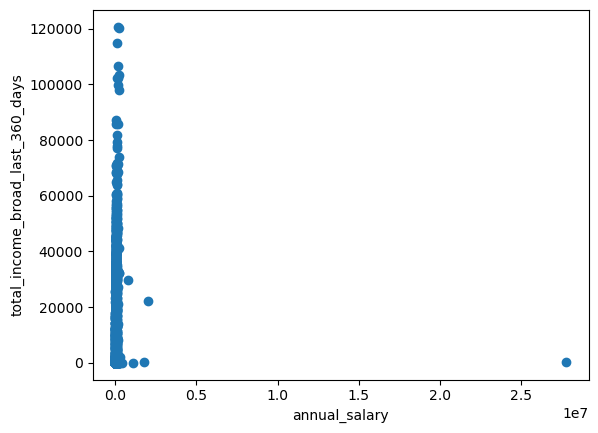

In [29]:
plt.scatter(app_bur_sum_data['annual_salary'], app_bur_sum_data['total_income_broad_last_360_days'])
plt.xlabel('annual_salary')
plt.ylabel('total_income_broad_last_360_days')

In [30]:
app_bur_sum_data_sub100K = app_bur_sum_data.query('10000 < annual_salary < 100000')

In [31]:
app_bur_sum_data_sub100K = app_bur_sum_data_sub100K.query('total_income_broad_last_360_days > 10000')

Text(0, 0.5, 'Broad Income over year (above £10,000)')

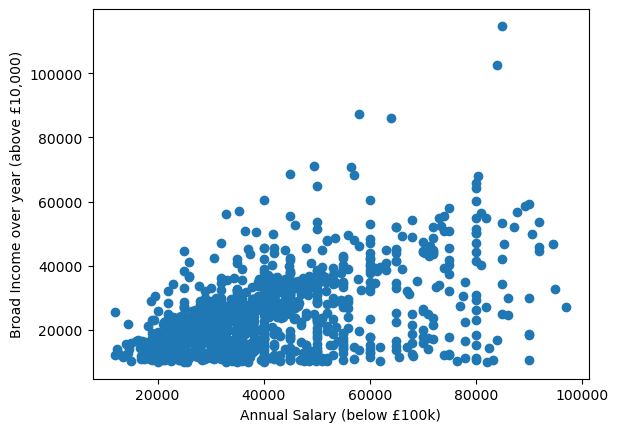

In [32]:
plt.scatter(app_bur_sum_data_sub100K['annual_salary'], app_bur_sum_data_sub100K['total_income_broad_last_360_days'])
plt.xlabel('Annual Salary (below £100k)')
plt.ylabel('Broad Income over year (above £10,000)')

In [33]:
app_bur_sum_data_sub100K['total_income_broad_last_360_days'].describe()

count      1272.000000
mean      23924.412484
std       11604.712093
min       10055.840000
25%       15858.732500
50%       21239.055000
75%       28993.145000
max      114705.070000
Name: total_income_broad_last_360_days, dtype: float64

# Model with merged SAB dataset

In [34]:
# Set joined data of Summary + Applicant + Bureau as a new df

df = sum_app_bur_data

In [35]:
## Option to load csv if saved joined data earlier

# df = pd.read_csv('SAB_merged.csv', index_col=False)

In [36]:
df

,uuid,date_created_x,unique_transaction_date_count_last_30_days,unique_transaction_date_count_last_90_days,unique_transaction_date_count_last_180_days,unique_transaction_date_count_last_360_days,transaction_count_last_30_days,transaction_count_last_90_days,transaction_count_last_180_days,transaction_count_last_360_days,...,salary_band_5000s,salary_band_10000s,credit_score_100s,has_mortgage_y,self_employed_flag,ccj_flag,missed_2+_payments_past_36m,o1,o2,o3
0,cea94c57-f8ce-4b2b-a5c1-56586a1f087c,2021-10-31,18,52,103,201,67,193,383,722,...,20000.0,20000.0,400.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0b3f70ad-1f42-4f60-9935-38e6e797b05e,2021-10-31,9,29,58,98,14,50,112,186,...,70000.0,70000.0,400.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,dfa1f7df-7839-4ad8-be4b-cb4c72bb5081,2021-10-31,28,85,167,330,111,315,674,1250,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4da950e3-5ab0-48a3-a4c6-0909370dda9e,2021-10-31,27,77,154,305,218,757,1343,2210,...,50000.0,50000.0,400.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3271609c-7173-4ba5-a8af-2c2c0131e034,2021-10-31,29,83,166,323,131,504,1105,2173,...,20000.0,20000.0,400.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25363,2f2a5b9d-bc82-402d-8a0a-031cb6dcaeba,2020-11-10,23,69,131,253,69,242,482,953,...,55000.0,50000.0,500.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
25364,b7560374-61cb-4308-9b33-2788dece11dc,2020-11-10,0,5,13,16,0,16,36,41,...,40000.0,40000.0,400.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25365,66cf31b4-ef92-4e42-9709-e845b9e11180,2020-11-10,24,70,133,257,154,401,681,1186,...,30000.0,30000.0,500.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
25366,37fa3e4f-9fe8-4f2f-ad41-862ac5eb7af4,2020-11-03,25,72,132,261,87,258,415,786,...,120000.0,120000.0,400.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Exploritory data analysis found NaN values. These must be dealt with

In [37]:
# Replace NaN in binary states such as used_savings_last_30_days with 0
df[['used_savings_last_30_days',
    'used_savings_last_90_days',
    'used_savings_last_180_days',
    'used_savings_last_360_days',
    'used_bnpl_last_30_days',
    'used_bnpl_last_90_days',
    'used_bnpl_last_180_days',
    'used_bnpl_last_360_days',
    'used_payday_last_30_days',
    'used_payday_last_90_days',
    'used_payday_last_180_days',
    'used_payday_last_360_days']] = df[['used_savings_last_30_days',
                                        'used_savings_last_90_days',
                                        'used_savings_last_180_days',
                                        'used_savings_last_360_days',
                                        'used_bnpl_last_30_days',
                                        'used_bnpl_last_90_days',
                                        'used_bnpl_last_180_days',
                                        'used_bnpl_last_360_days',
                                        'used_payday_last_30_days',
                                        'used_payday_last_90_days',
                                        'used_payday_last_180_days',
                                        'used_payday_last_360_days']].fillna(0)

In [38]:
df['used_savings_last_30_days']

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
25363    0.0
25364    0.0
25365    0.0
25366    0.0
25367    0.0
Name: used_savings_last_30_days, Length: 25368, dtype: float64

In [39]:
# Calculated values in Open Banking where dividing by income of 0
df[['essential_spending_over_income_last_30_days',
    'essential_spending_over_income_last_90_days',
    'essential_spending_over_income_last_180_days',
    'essential_spending_over_income_last_360_days',
    'benefits_over_income_last_30_days',
    'benefits_over_income_last_90_days',
    'benefits_over_income_last_180_days',
    'benefits_over_income_last_360_days',
    'savings_over_income_last_30_days',
    'savings_over_income_last_90_days',
    'savings_over_income_last_180_days',
    'savings_over_income_last_360_days',
    'gambling_over_income_last_30_days',
    'gambling_over_income_last_90_days',
    'gambling_over_income_last_180_days',
    'gambling_over_income_last_360_days']] = df[['essential_spending_over_income_last_30_days',
                                                 'essential_spending_over_income_last_90_days',
                                                 'essential_spending_over_income_last_180_days',
                                                 'essential_spending_over_income_last_360_days',
                                                 'benefits_over_income_last_30_days',
                                                 'benefits_over_income_last_90_days',
                                                 'benefits_over_income_last_180_days',
                                                 'benefits_over_income_last_360_days',
                                                 'savings_over_income_last_30_days',
                                                 'savings_over_income_last_90_days',
                                                 'savings_over_income_last_180_days',
                                                 'savings_over_income_last_360_days',
                                                 'gambling_over_income_last_30_days',
                                                 'gambling_over_income_last_90_days',
                                                 'gambling_over_income_last_180_days',
                                                 'gambling_over_income_last_360_days']].fillna(float('inf'))

In [40]:
df['essential_spending_over_income_last_360_days']

0        -1.2038
1            inf
2            inf
3        -0.5794
4        -1.5871
          ...   
25363        inf
25364        inf
25365        inf
25366        inf
25367   -14.9026
Name: essential_spending_over_income_last_360_days, Length: 25368, dtype: float64

In [41]:
# Create a df to determine how many missing values there still are.
df_na = df[df.isna().any(axis=1)]

# View the shape of the DataFrame.
df_na.shape

(24890, 189)

In [42]:
# Fill all other NaN values with 0 
df = df.fillna('0')

In [43]:
# Create a df to confirm there are no more missing values.
df_na_2 = df[df.isna().any(axis=1)]

# View the shape of the DataFrame.
df_na_2.shape

(0, 189)

In [44]:
df['amount_requested']

0        14000.0
1        15000.0
2              0
3        13000.0
4         1250.0
          ...   
25363     8000.0
25364     8000.0
25365    20000.0
25366    15000.0
25367    20000.0
Name: amount_requested, Length: 25368, dtype: object

In [45]:
# Columns must be numeric for later calculations:
df[('amount_requested')] = pd.to_numeric(df[('amount_requested')])
df[('duration_requested')] = pd.to_numeric(df[('duration_requested')])

In [46]:
df.head()

,uuid,date_created_x,unique_transaction_date_count_last_30_days,unique_transaction_date_count_last_90_days,unique_transaction_date_count_last_180_days,unique_transaction_date_count_last_360_days,transaction_count_last_30_days,transaction_count_last_90_days,transaction_count_last_180_days,transaction_count_last_360_days,...,salary_band_5000s,salary_band_10000s,credit_score_100s,has_mortgage_y,self_employed_flag,ccj_flag,missed_2+_payments_past_36m,o1,o2,o3
0,cea94c57-f8ce-4b2b-a5c1-56586a1f087c,2021-10-31,18,52,103,201,67,193,383,722,...,20000.0,20000.0,400.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0b3f70ad-1f42-4f60-9935-38e6e797b05e,2021-10-31,9,29,58,98,14,50,112,186,...,70000.0,70000.0,400.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,dfa1f7df-7839-4ad8-be4b-cb4c72bb5081,2021-10-31,28,85,167,330,111,315,674,1250,...,0,0,0,0,0,0,0,0,0,0
3,4da950e3-5ab0-48a3-a4c6-0909370dda9e,2021-10-31,27,77,154,305,218,757,1343,2210,...,50000.0,50000.0,400.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3271609c-7173-4ba5-a8af-2c2c0131e034,2021-10-31,29,83,166,323,131,504,1105,2173,...,20000.0,20000.0,400.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [47]:
# Check for duplicated lines
df[df.duplicated()]

,uuid,date_created_x,unique_transaction_date_count_last_30_days,unique_transaction_date_count_last_90_days,unique_transaction_date_count_last_180_days,unique_transaction_date_count_last_360_days,transaction_count_last_30_days,transaction_count_last_90_days,transaction_count_last_180_days,transaction_count_last_360_days,...,salary_band_5000s,salary_band_10000s,credit_score_100s,has_mortgage_y,self_employed_flag,ccj_flag,missed_2+_payments_past_36m,o1,o2,o3


In [48]:
# Make a new df for the model as a copy of the original df
df_model = df.copy()

In [49]:
# Ensure applicant data is present for repayment calculations
df_model = df_model.query('amount_requested > 0')

In [50]:
df_model['amount_requested'].describe()

count      8079.000000
mean       8500.225523
std        6545.719889
min        1000.000000
25%        4000.000000
50%        7500.000000
75%       11000.000000
max      100000.000000
Name: amount_requested, dtype: float64

In [51]:
# Code in this cell is to test it matches MCF repayments pretty closely
# (Note MCF's online calculator actually uses 22.2% not 24.6%)

# Define initial size of loan, duration of loan, and annual interest rate
P = 5000
months = 48
rate = 0.222

#calculate monthly payment
(rate/12) * (1/(1-(1+rate/12)**(-months)))*P

158.07378496019967

In [52]:
# Calculate repayments for each individual
rate = 0.246

df_model['monthly_repayments'] = (rate/12) * (1/(1-(1+rate/12)**(-df_model['duration_requested'])))*df_model['amount_requested']

In [53]:
# Check column has populated correctly
df_model['monthly_repayments'].describe()

count    8079.000000
mean      303.260007
std       200.071667
min        23.907952
25%       159.513107
50%       269.744866
75%       395.485768
max      2966.143263
Name: monthly_repayments, dtype: float64

In [54]:
# Calculate columns for check on total income and % of which is benefits
df_model.loc[:,'total_income_last_360_days'] = (df_model['total_income_broad_last_360_days']
                                          + df_model['total_benefits_last_360_days'])

df_model.loc[:,'%_of_income_is_benefits'] = (100*df_model['total_benefits_last_360_days']
                                       /df_model['total_income_last_360_days']).round(2)

In [55]:
# Create new columns for monthly amounts for model
df_model['broad_income_23Q2'] = df_model['total_income_broad_last_360_days']/12

df_model['benefits'] = df_model['total_benefits_last_360_days']/12

df_model['groceries_23Q2'] = df_model['total_groceries_spend_last_360_days']/12

# Rent and mortgage spend is taken from application data where it is positive.
# So that it matches the summary block (open banking data) it must be negative
df_model['mortgage_rent_23Q2'] = -df_model['rent_mortgage_spend']

df_model['bills_23Q2'] = df_model['total_bills_and_utilities_spend_last_360_days']/12

### Surplus Calculation is as follows:

##### Surplus = Total income - Essential Spending - Monthly Repayments

#### This breaks down into the following parts:

##### Surplus = (broad income + benefits) - (groceries + mortgage/rent + bills/utilities) - Monthly Repayments

In [56]:
# Calculation used due to spending being negative
df_model['monthly_surplus_23Q2'] = ((df_model['broad_income_23Q2'] 
                                     + df_model['benefits']) 
                                    + (df_model['groceries_23Q2'] 
                                       + df_model['mortgage_rent_23Q2'] 
                                       + df_model['bills_23Q2']) 
                                    - df_model['monthly_repayments'])

In [57]:
# This would be the calculation if spending was positive such as in Application info

# df_model['monthly_surplus_23Q2'] = ((df_model['broad_income_23Q2'] 
#                                      + df_model['benefits']) 
#                                     - (df_model['groceries_23Q2'] 
#                                        + df_model['mortgage_rent_23Q2'] 
#                                        + df_model['bills_23Q2']) 
#                                     - df_model['monthly_repayments'])

In [58]:
df_model = df_model.set_index('uuid')

In [59]:
# Enter next 8 quarterly forecasts for CPI from chosen forecaster

# Data provided by MCF taken as of CPI_23Q2
# CPI forecast figures used here are from OBR.
CPI_23Q3 = 5.412091288
CPI_23Q4 = 2.882148949
CPI_24Q1 = 1.531089406
CPI_24Q2 = 0.797566235
CPI_24Q3 = 0.568514951
CPI_24Q4 = 0.544749074
CPI_25Q1 = 0.526466942
CPI_25Q2 = 0.005162072

# Both groceries and bills/Utilities inflation will use CPI:

In [60]:
# Set other variables for inflation rates

# Wage inflation rates assumed for all applicants due to no information about work sector etc:
# Taken from OBR:
# https://obr.uk/forecasts-in-depth/the-economy-forecast/labour-market/#wagesandsalaries
wage_inf_23Q3 = 2.438846
wage_inf_23Q4 = 2.438846
wage_inf_24Q1 = 3.46652
wage_inf_24Q2 = 3.46652
wage_inf_24Q3 = 3.46652
wage_inf_24Q4 = 3.46652
wage_inf_25Q1 = 4.091478
wage_inf_25Q2 = 4.091478

# Separate rates for annual increase in Rent and Mortgage

# Mortgages will vary person to person, but in this case the repayments 
# are set to rise 30% at the end of 2024
mort_inf_2023 = 0
mort_inf_2024 = 30

# Rent will likewise vary individually, but set to rise by 4% at the 
# end of each year
rent_inf_2023 = 4
rent_inf_2024 = 4

In [61]:
# Calculate Broad income values for 2 years
df_model['curr_broad_income_23Q2'] = df_model['broad_income_23Q2']
# Inflation rate is per year, so over a quarter it would only have a partial impact
df_model['curr_broad_income_23Q3'] = df_model['curr_broad_income_23Q2'] * pow((1 + wage_inf_23Q3/100), 0.25)
df_model['curr_broad_income_23Q4'] = df_model['curr_broad_income_23Q3'] * pow((1 + wage_inf_23Q4/100), 0.25)
df_model['curr_broad_income_24Q1'] = df_model['curr_broad_income_23Q4'] * pow((1 + wage_inf_24Q1/100), 0.25)
df_model['curr_broad_income_24Q2'] = df_model['curr_broad_income_24Q1'] * pow((1 + wage_inf_24Q2/100), 0.25)
df_model['curr_broad_income_24Q3'] = df_model['curr_broad_income_24Q2'] * pow((1 + wage_inf_24Q3/100), 0.25)
df_model['curr_broad_income_24Q4'] = df_model['curr_broad_income_24Q3'] * pow((1 + wage_inf_24Q4/100), 0.25)
df_model['curr_broad_income_25Q1'] = df_model['curr_broad_income_24Q4'] * pow((1 + wage_inf_25Q1/100), 0.25)
df_model['curr_broad_income_25Q2'] = df_model['curr_broad_income_25Q1'] * pow((1 + wage_inf_25Q2/100), 0.25)

# Calculate groceries
df_model['curr_groceries_23Q2'] = df_model['groceries_23Q2']
# First three projected quarters are based on growth from previous quarter.
df_model['curr_groceries_23Q3'] = df_model['curr_groceries_23Q2'] * pow((1 + CPI_23Q3/100), 0.25)
df_model['curr_groceries_23Q4'] = df_model['curr_groceries_23Q3'] * pow((1 + CPI_23Q4/100), 0.25)
df_model['curr_groceries_24Q1'] = df_model['curr_groceries_23Q4'] * pow((1 + CPI_24Q1/100), 0.25)
# Subsequent quarters are applied from a year prior.
df_model['curr_groceries_24Q2'] = df_model['curr_groceries_23Q2'] * (1 + CPI_24Q2/100)
df_model['curr_groceries_24Q3'] = df_model['curr_groceries_23Q3'] * (1 + CPI_24Q3/100)
df_model['curr_groceries_24Q4'] = df_model['curr_groceries_23Q4'] * (1 + CPI_24Q4/100)
df_model['curr_groceries_25Q1'] = df_model['curr_groceries_24Q1'] * (1 + CPI_25Q1/100)
df_model['curr_groceries_25Q2'] = df_model['curr_groceries_24Q2'] * (1 + CPI_25Q2/100)

# Rent/Mortgage is static for Q2-Q4, annually rises in Q1
df_model['curr_mortgage_rent_23Q2'] = df_model['mortgage_rent_23Q2']
df_model['curr_mortgage_rent_23Q3'] = df_model['curr_mortgage_rent_23Q2']
df_model['curr_mortgage_rent_23Q4'] = df_model['curr_mortgage_rent_23Q3']
df_model['curr_mortgage_rent_24Q1'] = np.nan
df_model['curr_mortgage_rent_24Q1'] = df_model['curr_mortgage_rent_24Q1']\
        .mask(df_model['has_mortgage_y'] == 1,
              df_model['curr_mortgage_rent_23Q4']*(1+mort_inf_2023/100))\
        .mask(df_model['has_mortgage_y'] != 1,
                    df_model['curr_mortgage_rent_23Q4']*(1+rent_inf_2023/100))
df_model['curr_mortgage_rent_24Q2'] = df_model['curr_mortgage_rent_24Q1']
df_model['curr_mortgage_rent_24Q3'] = df_model['curr_mortgage_rent_24Q2']
df_model['curr_mortgage_rent_24Q4'] = df_model['curr_mortgage_rent_24Q3']
df_model['curr_mortgage_rent_25Q1'] = np.nan
df_model['curr_mortgage_rent_25Q1'] = df_model['curr_mortgage_rent_24Q1']\
        .mask(df_model['has_mortgage_y'] == 1,
              df_model['curr_mortgage_rent_24Q4']*(1+mort_inf_2024/100))\
        .mask(df_model['has_mortgage_y'] != 1,
                    df_model['curr_mortgage_rent_24Q4']*(1+rent_inf_2024/100))
df_model['curr_mortgage_rent_25Q2'] = df_model['curr_mortgage_rent_25Q1']

# Calculate bills/utilities using same method as groceries
df_model['curr_bills_23Q2'] = df_model['bills_23Q2']
df_model['curr_bills_23Q3'] = df_model['curr_bills_23Q2'] * pow((1 + CPI_23Q3/100), 0.25)
df_model['curr_bills_23Q4'] = df_model['curr_bills_23Q3'] * pow((1 + CPI_23Q4/100), 0.25)
df_model['curr_bills_24Q1'] = df_model['curr_bills_23Q4'] * pow((1 + CPI_24Q1/100), 0.25)
df_model['curr_bills_24Q2'] = df_model['curr_bills_23Q2'] * (1 + CPI_24Q2/100)
df_model['curr_bills_24Q3'] = df_model['curr_bills_23Q3'] * (1 + CPI_24Q3/100)
df_model['curr_bills_24Q4'] = df_model['curr_bills_23Q4'] * (1 + CPI_24Q4/100)
df_model['curr_bills_25Q1'] = df_model['curr_bills_24Q1'] * (1 + CPI_25Q1/100)
df_model['curr_bills_25Q2'] = df_model['curr_bills_24Q2'] * (1 + CPI_25Q2/100)

# Repeat for surplus
df_model['curr_monthly_surplus_23Q2'] = df_model['monthly_surplus_23Q2']

df_model['curr_monthly_surplus_23Q3'] = ((df_model['curr_broad_income_23Q3']
                                     + df_model['benefits'])
                                    + (df_model['curr_groceries_23Q3']
                                       + df_model['curr_mortgage_rent_23Q3']
                                       + df_model['curr_bills_23Q3'])
                                    - df_model['monthly_repayments'])
                    
df_model['curr_monthly_surplus_23Q4'] = ((df_model['curr_broad_income_23Q4']
                                     + df_model['benefits'])
                                    + (df_model['curr_groceries_23Q4']
                                       + df_model['curr_mortgage_rent_23Q4']
                                       + df_model['curr_bills_23Q4'])
                                    - df_model['monthly_repayments'])
                    
df_model['curr_monthly_surplus_24Q1'] = ((df_model['curr_broad_income_24Q1']
                                     + df_model['benefits'])
                                    + (df_model['curr_groceries_24Q1']
                                       + df_model['curr_mortgage_rent_24Q1']
                                       + df_model['curr_bills_24Q1'])
                                    - df_model['monthly_repayments'])
                    
df_model['curr_monthly_surplus_24Q2'] = ((df_model['curr_broad_income_24Q2']
                                     + df_model['benefits'])
                                    + (df_model['curr_groceries_24Q2']
                                       + df_model['curr_mortgage_rent_24Q2']
                                       + df_model['curr_bills_24Q2'])
                                    - df_model['monthly_repayments'])
                    
df_model['curr_monthly_surplus_24Q3'] = ((df_model['curr_broad_income_24Q3']
                                     + df_model['benefits'])
                                    + (df_model['curr_groceries_24Q3']
                                       + df_model['curr_mortgage_rent_24Q3']
                                       + df_model['curr_bills_24Q3'])
                                    - df_model['monthly_repayments'])
                    
df_model['curr_monthly_surplus_24Q4'] = ((df_model['curr_broad_income_24Q4']
                                     + df_model['benefits'])
                                    + (df_model['curr_groceries_24Q4']
                                       + df_model['curr_mortgage_rent_24Q4']
                                       + df_model['curr_bills_24Q4'])
                                    - df_model['monthly_repayments'])
                    
df_model['curr_monthly_surplus_25Q1'] = ((df_model['curr_broad_income_25Q1']
                                     + df_model['benefits'])
                                    + (df_model['curr_groceries_25Q1']
                                       + df_model['curr_mortgage_rent_25Q1']
                                       + df_model['curr_bills_25Q1'])
                                    - df_model['monthly_repayments'])
                    
df_model['curr_monthly_surplus_25Q2'] = ((df_model['curr_broad_income_25Q2']
                                     + df_model['benefits'])
                                    + (df_model['curr_groceries_25Q2']
                                       + df_model['curr_mortgage_rent_25Q2']
                                       + df_model['curr_bills_25Q2'])
                                    - df_model['monthly_repayments'])

In [62]:
# Reset the df to avoid performance issues from fragmenting
df_model = df_model.copy()

In [63]:
# Set Historic CPI figures for comparison.
hist_CPI_23Q3 = 2.7
hist_CPI_23Q4 = 4.4
hist_CPI_24Q1 = 5.5
hist_CPI_24Q2 = 7.9
hist_CPI_24Q3 = 8.7
hist_CPI_24Q4 = 9.4
hist_CPI_25Q1 = 9.0
hist_CPI_25Q2 = 7.7

In [64]:
# Set other historic variables for inflation rates
# Currently set to identical rates as the current forecast, able to change though

# Wage inflation:
hist_wage_inf_23Q3 = 2.438846
hist_wage_inf_23Q4 = 2.438846
hist_wage_inf_24Q1 = 3.46652
hist_wage_inf_24Q2 = 3.46652
hist_wage_inf_24Q3 = 3.46652
hist_wage_inf_24Q4 = 3.46652
hist_wage_inf_25Q1 = 4.091478
hist_wage_inf_25Q2 = 4.091478

# Separate rates for annual increase in Rent and Mortgage

hist_mort_inf_2023 = 0
hist_mort_inf_2024 = 30
hist_rent_inf_2023 = 4
hist_rent_inf_2024 = 4

In [65]:
# Repeat relevant calculations for historic rates
df_model['hist_broad_income_23Q2'] = df_model['broad_income_23Q2']
df_model['hist_broad_income_23Q3'] = df_model['hist_broad_income_23Q2'] * pow((1 + hist_wage_inf_23Q3/100), 0.25)
df_model['hist_broad_income_23Q4'] = df_model['hist_broad_income_23Q3'] * pow((1 + hist_wage_inf_23Q4/100), 0.25)
df_model['hist_broad_income_24Q1'] = df_model['hist_broad_income_23Q4'] * pow((1 + hist_wage_inf_24Q1/100), 0.25)
df_model['hist_broad_income_24Q2'] = df_model['hist_broad_income_24Q1'] * pow((1 + hist_wage_inf_24Q2/100), 0.25)
df_model['hist_broad_income_24Q3'] = df_model['hist_broad_income_24Q2'] * pow((1 + hist_wage_inf_24Q3/100), 0.25)
df_model['hist_broad_income_24Q4'] = df_model['hist_broad_income_24Q3'] * pow((1 + hist_wage_inf_24Q4/100), 0.25)
df_model['hist_broad_income_25Q1'] = df_model['hist_broad_income_24Q4'] * pow((1 + hist_wage_inf_25Q1/100), 0.25)
df_model['hist_broad_income_25Q2'] = df_model['hist_broad_income_25Q1'] * pow((1 + hist_wage_inf_25Q2/100), 0.25)

# Calculate groceries
df_model['hist_groceries_23Q2'] = df_model['groceries_23Q2']
df_model['hist_groceries_23Q3'] = df_model['hist_groceries_23Q2'] * pow((1 + hist_CPI_23Q3/100), 0.25)
df_model['hist_groceries_23Q4'] = df_model['hist_groceries_23Q3'] * pow((1 + hist_CPI_23Q4/100), 0.25)
df_model['hist_groceries_24Q1'] = df_model['hist_groceries_23Q4'] * pow((1 + hist_CPI_24Q1/100), 0.25)
df_model['hist_groceries_24Q2'] = df_model['hist_groceries_23Q2'] * (1 + hist_CPI_24Q2/100)
df_model['hist_groceries_24Q3'] = df_model['hist_groceries_23Q3'] * (1 + hist_CPI_24Q3/100)
df_model['hist_groceries_24Q4'] = df_model['hist_groceries_23Q4'] * (1 + hist_CPI_24Q4/100)
df_model['hist_groceries_25Q1'] = df_model['hist_groceries_24Q1'] * (1 + hist_CPI_25Q1/100)
df_model['hist_groceries_25Q2'] = df_model['hist_groceries_24Q2'] * (1 + hist_CPI_25Q2/100)

# Rent/Mortgage is static for Q2-Q4, annually rises in Q1
df_model['hist_mortgage_rent_23Q2'] = df_model['mortgage_rent_23Q2']
df_model['hist_mortgage_rent_23Q3'] = df_model['hist_mortgage_rent_23Q2']
df_model['hist_mortgage_rent_23Q4'] = df_model['hist_mortgage_rent_23Q3']
df_model['hist_mortgage_rent_24Q1'] = np.nan
df_model['hist_mortgage_rent_24Q1'] = df_model['hist_mortgage_rent_24Q1']\
        .mask(df_model['has_mortgage_y'] == 1,
              df_model['hist_mortgage_rent_23Q4']*(1+hist_mort_inf_2023/100))\
        .mask(df_model['has_mortgage_y'] != 1,
                    df_model['hist_mortgage_rent_23Q4']*(1+hist_rent_inf_2023/100))
df_model['hist_mortgage_rent_24Q2'] = df_model['hist_mortgage_rent_24Q1']
df_model['hist_mortgage_rent_24Q3'] = df_model['hist_mortgage_rent_24Q2']
df_model['hist_mortgage_rent_24Q4'] = df_model['hist_mortgage_rent_24Q3']
df_model['hist_mortgage_rent_25Q1'] = np.nan
df_model['hist_mortgage_rent_25Q1'] = df_model['hist_mortgage_rent_24Q1']\
        .mask(df_model['has_mortgage_y'] == 1,
              df_model['hist_mortgage_rent_24Q4']*(1+hist_mort_inf_2024/100))\
        .mask(df_model['has_mortgage_y'] != 1,
                    df_model['hist_mortgage_rent_24Q4']*(1+hist_rent_inf_2024/100))
df_model['hist_mortgage_rent_25Q2'] = df_model['hist_mortgage_rent_25Q1']

# Calculate bills
df_model['hist_bills_23Q2'] = df_model['bills_23Q2']
df_model['hist_bills_23Q3'] = df_model['hist_bills_23Q2'] * pow((1 + hist_CPI_23Q3/100), 0.25)
df_model['hist_bills_23Q4'] = df_model['hist_bills_23Q3'] * pow((1 + hist_CPI_23Q4/100), 0.25)
df_model['hist_bills_24Q1'] = df_model['hist_bills_23Q4'] * pow((1 + hist_CPI_24Q1/100), 0.25)
df_model['hist_bills_24Q2'] = df_model['hist_bills_23Q2'] * (1 + hist_CPI_24Q2/100)
df_model['hist_bills_24Q3'] = df_model['hist_bills_23Q3'] * (1 + hist_CPI_24Q3/100)
df_model['hist_bills_24Q4'] = df_model['hist_bills_23Q4'] * (1 + hist_CPI_24Q4/100)
df_model['hist_bills_25Q1'] = df_model['hist_bills_24Q1'] * (1 + hist_CPI_25Q1/100)
df_model['hist_bills_25Q2'] = df_model['hist_bills_24Q2'] * (1 + hist_CPI_25Q2/100)

# Repeat for surplus
df_model['hist_monthly_surplus_23Q2'] = df_model['monthly_surplus_23Q2']

df_model['hist_monthly_surplus_23Q3'] = ((df_model['hist_broad_income_23Q3']
                                     + df_model['benefits'])
                                    + (df_model['hist_groceries_23Q3']
                                       + df_model['hist_mortgage_rent_23Q3']
                                       + df_model['hist_bills_23Q3'])
                                    - df_model['monthly_repayments'])
                    
df_model['hist_monthly_surplus_23Q4'] = ((df_model['hist_broad_income_23Q4']
                                     + df_model['benefits'])
                                    + (df_model['hist_groceries_23Q4']
                                       + df_model['hist_mortgage_rent_23Q4']
                                       + df_model['hist_bills_23Q4'])
                                    - df_model['monthly_repayments'])
                    
df_model['hist_monthly_surplus_24Q1'] = ((df_model['hist_broad_income_24Q1']
                                     + df_model['benefits'])
                                    + (df_model['hist_groceries_24Q1']
                                       + df_model['hist_mortgage_rent_24Q1']
                                       + df_model['hist_bills_24Q1'])
                                    - df_model['monthly_repayments'])
                    
df_model['hist_monthly_surplus_24Q2'] = ((df_model['hist_broad_income_24Q2']
                                     + df_model['benefits'])
                                    + (df_model['hist_groceries_24Q2']
                                       + df_model['hist_mortgage_rent_24Q2']
                                       + df_model['hist_bills_24Q2'])
                                    - df_model['monthly_repayments'])
                    
df_model['hist_monthly_surplus_24Q3'] = ((df_model['hist_broad_income_24Q3']
                                     + df_model['benefits'])
                                    + (df_model['hist_groceries_24Q3']
                                       + df_model['hist_mortgage_rent_24Q3']
                                       + df_model['hist_bills_24Q3'])
                                    - df_model['monthly_repayments'])
                    
df_model['hist_monthly_surplus_24Q4'] = ((df_model['hist_broad_income_24Q4']
                                     + df_model['benefits'])
                                    + (df_model['hist_groceries_24Q4']
                                       + df_model['hist_mortgage_rent_24Q4']
                                       + df_model['hist_bills_24Q4'])
                                    - df_model['monthly_repayments'])
                    
df_model['hist_monthly_surplus_25Q1'] = ((df_model['hist_broad_income_25Q1']
                                     + df_model['benefits'])
                                    + (df_model['hist_groceries_25Q1']
                                       + df_model['hist_mortgage_rent_25Q1']
                                       + df_model['hist_bills_25Q1'])
                                    - df_model['monthly_repayments'])
                    
df_model['hist_monthly_surplus_25Q2'] = ((df_model['hist_broad_income_25Q2']
                                     + df_model['benefits'])
                                    + (df_model['hist_groceries_25Q2']
                                       + df_model['hist_mortgage_rent_25Q2']
                                       + df_model['hist_bills_25Q2'])
                                    - df_model['monthly_repayments'])

In [66]:
df_model = df_model.copy()

In [67]:
# Set further percentage to add to historic CPI rates to see a more drastic cost of living crisis.
worse_add = 5

In [68]:
# Repeat relevant calculations for historic rates + additional CPI rate
df_model['worse_broad_income_23Q2'] = df_model['broad_income_23Q2']
df_model['worse_broad_income_23Q3'] = df_model['worse_broad_income_23Q2'] * pow((1 + hist_wage_inf_23Q3/100), 0.25)
df_model['worse_broad_income_23Q4'] = df_model['worse_broad_income_23Q3'] * pow((1 + hist_wage_inf_23Q4/100), 0.25)
df_model['worse_broad_income_24Q1'] = df_model['worse_broad_income_23Q4'] * pow((1 + hist_wage_inf_24Q1/100), 0.25)
df_model['worse_broad_income_24Q2'] = df_model['worse_broad_income_24Q1'] * pow((1 + hist_wage_inf_24Q2/100), 0.25)
df_model['worse_broad_income_24Q3'] = df_model['worse_broad_income_24Q2'] * pow((1 + hist_wage_inf_24Q3/100), 0.25)
df_model['worse_broad_income_24Q4'] = df_model['worse_broad_income_24Q3'] * pow((1 + hist_wage_inf_24Q4/100), 0.25)
df_model['worse_broad_income_25Q1'] = df_model['worse_broad_income_24Q4'] * pow((1 + hist_wage_inf_25Q1/100), 0.25)
df_model['worse_broad_income_25Q2'] = df_model['worse_broad_income_25Q1'] * pow((1 + hist_wage_inf_25Q2/100), 0.25)

# Calculate groceries
df_model['worse_groceries_23Q2'] = df_model['groceries_23Q2']
df_model['worse_groceries_23Q3'] = df_model['worse_groceries_23Q2'] * pow((1 + (worse_add + hist_CPI_23Q3)/100), 0.25)
df_model['worse_groceries_23Q4'] = df_model['worse_groceries_23Q3'] * pow((1 + (worse_add + hist_CPI_23Q4)/100), 0.25)
df_model['worse_groceries_24Q1'] = df_model['worse_groceries_23Q4'] * pow((1 + (worse_add + hist_CPI_24Q1)/100), 0.25)
df_model['worse_groceries_24Q2'] = df_model['worse_groceries_23Q2'] * (1 + (worse_add + hist_CPI_24Q2)/100)
df_model['worse_groceries_24Q3'] = df_model['worse_groceries_23Q3'] * (1 + (worse_add + hist_CPI_24Q3)/100)
df_model['worse_groceries_24Q4'] = df_model['worse_groceries_23Q4'] * (1 + (worse_add + hist_CPI_24Q4)/100)
df_model['worse_groceries_25Q1'] = df_model['worse_groceries_24Q1'] * (1 + (worse_add + hist_CPI_25Q1)/100)
df_model['worse_groceries_25Q2'] = df_model['worse_groceries_24Q2'] * (1 + (worse_add + hist_CPI_25Q2)/100)

# Rent/Mortgage is static for Q2-Q4, annually rises in Q1
df_model['worse_mortgage_rent_23Q2'] = df_model['mortgage_rent_23Q2']
df_model['worse_mortgage_rent_23Q3'] = df_model['worse_mortgage_rent_23Q2']
df_model['worse_mortgage_rent_23Q4'] = df_model['worse_mortgage_rent_23Q3']
df_model['worse_mortgage_rent_24Q1'] = np.nan
df_model['worse_mortgage_rent_24Q1'] = df_model['worse_mortgage_rent_24Q1']\
        .mask(df_model['has_mortgage_y'] == 1,
              df_model['worse_mortgage_rent_23Q4']*(1+hist_mort_inf_2023/100))\
        .mask(df_model['has_mortgage_y'] != 1,
                    df_model['worse_mortgage_rent_23Q4']*(1+hist_rent_inf_2023/100))
df_model['worse_mortgage_rent_24Q2'] = df_model['worse_mortgage_rent_24Q1']
df_model['worse_mortgage_rent_24Q3'] = df_model['worse_mortgage_rent_24Q2']
df_model['worse_mortgage_rent_24Q4'] = df_model['worse_mortgage_rent_24Q3']
df_model['worse_mortgage_rent_25Q1'] = np.nan
df_model['worse_mortgage_rent_25Q1'] = df_model['worse_mortgage_rent_24Q1']\
        .mask(df_model['has_mortgage_y'] == 1,
              df_model['worse_mortgage_rent_24Q4']*(1+hist_mort_inf_2024/100))\
        .mask(df_model['has_mortgage_y'] != 1,
                    df_model['worse_mortgage_rent_24Q4']*(1+hist_rent_inf_2024/100))
df_model['worse_mortgage_rent_25Q2'] = df_model['worse_mortgage_rent_25Q1']


# Calculate bills
df_model['worse_bills_23Q2'] = df_model['bills_23Q2']
df_model['worse_bills_23Q3'] = df_model['worse_bills_23Q2'] * pow((1 + (worse_add + hist_CPI_23Q3)/100), 0.25)
df_model['worse_bills_23Q4'] = df_model['worse_bills_23Q3'] * pow((1 + (worse_add + hist_CPI_23Q4)/100), 0.25)
df_model['worse_bills_24Q1'] = df_model['worse_bills_23Q4'] * pow((1 + (worse_add + hist_CPI_24Q1)/100), 0.25)
df_model['worse_bills_24Q2'] = df_model['worse_bills_23Q2'] * (1 + (worse_add + hist_CPI_24Q2)/100)
df_model['worse_bills_24Q3'] = df_model['worse_bills_23Q3'] * (1 + (worse_add + hist_CPI_24Q3)/100)
df_model['worse_bills_24Q4'] = df_model['worse_bills_23Q4'] * (1 + (worse_add + hist_CPI_24Q4)/100)
df_model['worse_bills_25Q1'] = df_model['worse_bills_24Q1'] * (1 + (worse_add + hist_CPI_25Q1)/100)
df_model['worse_bills_25Q2'] = df_model['worse_bills_24Q2'] * (1 + (worse_add + hist_CPI_25Q2)/100)

# Repeat for surplus
df_model['worse_monthly_surplus_23Q2'] = df_model['monthly_surplus_23Q2']

df_model['worse_monthly_surplus_23Q3'] = ((df_model['worse_broad_income_23Q3']
                                     + df_model['benefits'])
                                    + (df_model['worse_groceries_23Q3']
                                       + df_model['worse_mortgage_rent_23Q3']
                                       + df_model['worse_bills_23Q3'])
                                    - df_model['monthly_repayments'])
                    
df_model['worse_monthly_surplus_23Q4'] = ((df_model['worse_broad_income_23Q4']
                                     + df_model['benefits'])
                                    + (df_model['worse_groceries_23Q4']
                                       + df_model['worse_mortgage_rent_23Q4']
                                       + df_model['worse_bills_23Q4'])
                                    - df_model['monthly_repayments'])
                    
df_model['worse_monthly_surplus_24Q1'] = ((df_model['worse_broad_income_24Q1']
                                     + df_model['benefits'])
                                    + (df_model['worse_groceries_24Q1']
                                       + df_model['worse_mortgage_rent_24Q1']
                                       + df_model['worse_bills_24Q1'])
                                    - df_model['monthly_repayments'])
                    
df_model['worse_monthly_surplus_24Q2'] = ((df_model['worse_broad_income_24Q2']
                                     + df_model['benefits'])
                                    + (df_model['worse_groceries_24Q2']
                                       + df_model['worse_mortgage_rent_24Q2']
                                       + df_model['worse_bills_24Q2'])
                                    - df_model['monthly_repayments'])
                    
df_model['worse_monthly_surplus_24Q3'] = ((df_model['worse_broad_income_24Q3']
                                     + df_model['benefits'])
                                    + (df_model['worse_groceries_24Q3']
                                       + df_model['worse_mortgage_rent_24Q3']
                                       + df_model['worse_bills_24Q3'])
                                    - df_model['monthly_repayments'])
                    
df_model['worse_monthly_surplus_24Q4'] = ((df_model['worse_broad_income_24Q4']
                                     + df_model['benefits'])
                                    + (df_model['worse_groceries_24Q4']
                                       + df_model['worse_mortgage_rent_24Q4']
                                       + df_model['worse_bills_24Q4'])
                                    - df_model['monthly_repayments'])
                    
df_model['worse_monthly_surplus_25Q1'] = ((df_model['worse_broad_income_25Q1']
                                     + df_model['benefits'])
                                    + (df_model['worse_groceries_25Q1']
                                       + df_model['worse_mortgage_rent_25Q1']
                                       + df_model['worse_bills_25Q1'])
                                    - df_model['monthly_repayments'])
                    
df_model['worse_monthly_surplus_25Q2'] = ((df_model['worse_broad_income_25Q2']
                                     + df_model['benefits'])
                                    + (df_model['worse_groceries_25Q2']
                                       + df_model['worse_mortgage_rent_25Q2']
                                       + df_model['worse_bills_25Q2'])
                                    - df_model['monthly_repayments'])

In [69]:
df_model

,date_created_x,unique_transaction_date_count_last_30_days,unique_transaction_date_count_last_90_days,unique_transaction_date_count_last_180_days,unique_transaction_date_count_last_360_days,transaction_count_last_30_days,transaction_count_last_90_days,transaction_count_last_180_days,transaction_count_last_360_days,transaction_count_current_account_last_30_days,...,worse_bills_25Q2,worse_monthly_surplus_23Q2,worse_monthly_surplus_23Q3,worse_monthly_surplus_23Q4,worse_monthly_surplus_24Q1,worse_monthly_surplus_24Q2,worse_monthly_surplus_24Q3,worse_monthly_surplus_24Q4,worse_monthly_surplus_25Q1,worse_monthly_surplus_25Q2
uuid,,,,,,,,,,,,,,,,,,,,,
cea94c57-f8ce-4b2b-a5c1-56586a1f087c,2021-10-31,18,52,103,201,67,193,383,722,67,...,0.000000,-413.462775,-414.106311,-414.901865,-415.807231,-417.897903,-418.90465,-420.059934,-420.948771,-422.82753
0b3f70ad-1f42-4f60-9935-38e6e797b05e,2021-10-31,9,29,58,98,14,50,112,186,13,...,0.000000,-1242.321723,-1242.425841,-1242.554555,-1274.701034,-1275.039286,-1275.202168,-1275.389082,-1308.812888,-1309.116854
4da950e3-5ab0-48a3-a4c6-0909370dda9e,2021-10-31,27,77,154,305,218,757,1343,2210,218,...,-51.589829,618.743501,621.608364,621.355867,625.820449,605.404126,608.129277,607.916726,292.091013,281.406948
3271609c-7173-4ba5-a8af-2c2c0131e034,2021-10-31,29,83,166,323,131,504,1105,2173,123,...,0.000000,-842.023585,-864.803817,-894.851761,-943.684524,-1032.470237,-1068.981039,-1112.539307,-1158.690882,-1234.667061
e53b2f28-52c6-471c-8206-f0c3d49306f2,2021-10-31,19,62,125,246,72,238,545,902,72,...,-104.378879,-895.419368,-898.237702,-901.721793,-931.686797,-940.84279,-945.25179,-950.311302,-981.24392,-989.471849
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2f2a5b9d-bc82-402d-8a0a-031cb6dcaeba,2020-11-10,23,69,131,253,69,242,482,953,69,...,0.000000,-670.686213,-672.131435,-673.918053,-675.95128,-680.64641,-682.907315,-685.501798,-786.497906,-790.717131
b7560374-61cb-4308-9b33-2788dece11dc,2020-11-10,0,5,13,16,0,16,36,41,0,...,0.000000,-988.475379,-988.475379,-988.475379,-1017.475379,-1017.475379,-1017.475379,-1017.475379,-1047.635379,-1047.635379
66cf31b4-ef92-4e42-9709-e845b9e11180,2020-11-10,24,70,133,257,154,401,681,1186,154,...,-131.771164,-1533.843964,-1543.043768,-1554.416778,-1567.35962,-1597.247249,-1611.639413,-1628.155023,-1778.861578,-1805.719755


In [70]:
# Save a copy
df_model.to_csv('curr_hist_worse_modelled_data_all.csv')

In [71]:
## Optional to remove outliers - not required in this analysis
# import scipy.stats as stats

## Set which columns to check for outliers
# outliers_check = ['total_income_broad_last_360_days',
#                   'total_benefits_last_360_days',
#                   'total_groceries_spend_last_360_days',
#                   'rent_mortgage_spend',
#                   'total_bills_and_utilities_spend_last_360_days']

## Find Q1, Q3, and interquartile range for each column
# Q1 = df_model[outliers_check].quantile(q=.25)
# Q3 = df_model[outliers_check].quantile(q=.75)
# IQR = df_model[outliers_check].apply(stats.iqr)

## Set leniency for how far from IQR values are allowed to be
# leniency = 5

## Only keep rows in dataframe that have values within leniency*IQR of Q1 and Q3
# df_model_no_out = df_model[~((df_model[outliers_check] < (Q1-leniency*IQR)) | (df_model[outliers_check] > (Q3+leniency*IQR))).any(axis=1)]


In [72]:
# Apply Basic Eligability Criteria (BEC)
df_model_BEC_applied_half = df_model.query('total_income_last_360_days > 16262')

df_model_BEC_applied = df_model_BEC_applied_half.query('total_income_broad_last_360_days > 8131')

df_model_BEC_applied.shape

(1036, 332)

In [73]:
# Save dataframe with BEC applied for overall analysis
df_model_BEC_applied.to_csv('BEC_curr_hist_worse_modelled_data.csv')

In [74]:
# Save a subset of columns from DF for analysis in Tableau
df_model_BEC_select_cols = df_model_BEC_applied[['benefits',
                                                 'employment_status',
                                                 'total_income_last_360_days',
                                                 'total_income_broad_last_360_days',
                                                 'total_benefits_last_360_days',
                                                 'has_mortgage_y',
                                                 'dependant_number',
                                                 'total_gambling_spend_last_360_days',
                                                 'total_payday_spend_last_360_days',
                                                 'total_savings_spend_last_360_days',
                                                 'low_balance_last_360_days',
                                                 'avg_balance_last_360_days',
                                                 'high_balance_last_360_days',
                                                 'days_in_overdraft_last_360_days',
                                                 'avg_overdraft_amount_last_360_days',
                                                 'max_overdraft_amount_last_360_days',
                                                 'reason',
                                                 'new_to_credit_on_date_created',
                                                 'credit_score_100s',
                                                 'ccj_flag',
                                                 'missed_2+_payments_past_36m',
                                                 'o1', 'o2', 'o3',
                                                 'monthly_repayments',
                                                 'curr_broad_income_23Q2',
                                                 'curr_broad_income_23Q3',
                                                 'curr_broad_income_23Q4',
                                                 'curr_broad_income_24Q1',
                                                 'curr_broad_income_24Q2',
                                                 'curr_broad_income_24Q3',
                                                 'curr_broad_income_24Q4',
                                                 'curr_broad_income_25Q1',
                                                 'curr_broad_income_25Q2',
                                                 'curr_groceries_23Q2',
                                                 'curr_groceries_23Q3',
                                                 'curr_groceries_23Q4',
                                                 'curr_groceries_24Q1',
                                                 'curr_groceries_24Q2',
                                                 'curr_groceries_24Q3',
                                                 'curr_groceries_24Q4',
                                                 'curr_groceries_25Q1',
                                                 'curr_groceries_25Q2',
                                                 'curr_mortgage_rent_23Q2',
                                                 'curr_mortgage_rent_23Q3',
                                                 'curr_mortgage_rent_23Q4',
                                                 'curr_mortgage_rent_24Q1',
                                                 'curr_mortgage_rent_24Q2',
                                                 'curr_mortgage_rent_24Q3',
                                                 'curr_mortgage_rent_24Q4',
                                                 'curr_mortgage_rent_25Q1',
                                                 'curr_mortgage_rent_25Q2',
                                                 'curr_bills_23Q2',
                                                 'curr_bills_23Q3',
                                                 'curr_bills_23Q4',
                                                 'curr_bills_24Q1',
                                                 'curr_bills_24Q2',
                                                 'curr_bills_24Q3',
                                                 'curr_bills_24Q4',
                                                 'curr_bills_25Q1',
                                                 'curr_bills_25Q2',
                                                 'curr_monthly_surplus_23Q2',
                                                 'curr_monthly_surplus_23Q3',
                                                 'curr_monthly_surplus_23Q4',
                                                 'curr_monthly_surplus_24Q1',
                                                 'curr_monthly_surplus_24Q2',
                                                 'curr_monthly_surplus_24Q3',
                                                 'curr_monthly_surplus_24Q4',
                                                 'curr_monthly_surplus_25Q1',
                                                 'curr_monthly_surplus_25Q2',
                                                 'hist_broad_income_23Q2',
                                                 'hist_broad_income_23Q3',
                                                 'hist_broad_income_23Q4',
                                                 'hist_broad_income_24Q1',
                                                 'hist_broad_income_24Q2',
                                                 'hist_broad_income_24Q3',
                                                 'hist_broad_income_24Q4',
                                                 'hist_broad_income_25Q1',
                                                 'hist_broad_income_25Q2',
                                                 'hist_groceries_23Q2',
                                                 'hist_groceries_23Q3',
                                                 'hist_groceries_23Q4',
                                                 'hist_groceries_24Q1',
                                                 'hist_groceries_24Q2',
                                                 'hist_groceries_24Q3',
                                                 'hist_groceries_24Q4',
                                                 'hist_groceries_25Q1',
                                                 'hist_groceries_25Q2',
                                                 'hist_mortgage_rent_23Q2',
                                                 'hist_mortgage_rent_23Q3',
                                                 'hist_mortgage_rent_23Q4',
                                                 'hist_mortgage_rent_24Q1',
                                                 'hist_mortgage_rent_24Q2',
                                                 'hist_mortgage_rent_24Q3',
                                                 'hist_mortgage_rent_24Q4',
                                                 'hist_mortgage_rent_25Q1',
                                                 'hist_mortgage_rent_25Q2',
                                                 'hist_bills_23Q2',
                                                 'hist_bills_23Q3',
                                                 'hist_bills_23Q4',
                                                 'hist_bills_24Q1',
                                                 'hist_bills_24Q2',
                                                 'hist_bills_24Q3',
                                                 'hist_bills_24Q4',
                                                 'hist_bills_25Q1',
                                                 'hist_bills_25Q2',
                                                 'hist_monthly_surplus_23Q2',
                                                 'hist_monthly_surplus_23Q3',
                                                 'hist_monthly_surplus_23Q4',
                                                 'hist_monthly_surplus_24Q1',
                                                 'hist_monthly_surplus_24Q2',
                                                 'hist_monthly_surplus_24Q3',
                                                 'hist_monthly_surplus_24Q4',
                                                 'hist_monthly_surplus_25Q1',
                                                 'hist_monthly_surplus_25Q2',
                                                 'worse_broad_income_23Q2',
                                                 'worse_broad_income_23Q3',
                                                 'worse_broad_income_23Q4',
                                                 'worse_broad_income_24Q1',
                                                 'worse_broad_income_24Q2',
                                                 'worse_broad_income_24Q3',
                                                 'worse_broad_income_24Q4',
                                                 'worse_broad_income_25Q1',
                                                 'worse_broad_income_25Q2',
                                                 'worse_groceries_23Q2',
                                                 'worse_groceries_23Q3',
                                                 'worse_groceries_23Q4',
                                                 'worse_groceries_24Q1',
                                                 'worse_groceries_24Q2',
                                                 'worse_groceries_24Q3',
                                                 'worse_groceries_24Q4',
                                                 'worse_groceries_25Q1',
                                                 'worse_groceries_25Q2',
                                                 'worse_mortgage_rent_23Q2',
                                                 'worse_mortgage_rent_23Q3',
                                                 'worse_mortgage_rent_23Q4',
                                                 'worse_mortgage_rent_24Q1',
                                                 'worse_mortgage_rent_24Q2',
                                                 'worse_mortgage_rent_24Q3',
                                                 'worse_mortgage_rent_24Q4',
                                                 'worse_mortgage_rent_25Q1',
                                                 'worse_mortgage_rent_25Q2',
                                                 'worse_bills_23Q2',
                                                 'worse_bills_23Q3',
                                                 'worse_bills_23Q4',
                                                 'worse_bills_24Q1',
                                                 'worse_bills_24Q2',
                                                 'worse_bills_24Q3',
                                                 'worse_bills_24Q4',
                                                 'worse_bills_25Q1',
                                                 'worse_bills_25Q2',
                                                 'worse_monthly_surplus_23Q2',
                                                 'worse_monthly_surplus_23Q3',
                                                 'worse_monthly_surplus_23Q4',
                                                 'worse_monthly_surplus_24Q1',
                                                 'worse_monthly_surplus_24Q2',
                                                 'worse_monthly_surplus_24Q3',
                                                 'worse_monthly_surplus_24Q4',
                                                 'worse_monthly_surplus_25Q1',
                                                 'worse_monthly_surplus_25Q2']]

In [75]:
# Save a copy for analysis in Tableau
df_model_BEC_select_cols.to_csv('BEC_curr_hist_worse_modelled_data_select_cols.csv')

### Further analysis alongside work in Tableau

In [76]:
# Load specific columns from the CSV file
columns_reviewed = ['total_income_last_360_days', 'benefits', 'groceries_23Q2', 'mortgage_rent_23Q2']
data = pd.read_csv('BEC_curr_hist_worse_modelled_data.csv', usecols=columns_reviewed)

# Print the loaded DataFrame
print(data)

      total_income_last_360_days    benefits  groceries_23Q2  \
0                       35357.16  218.395833     -687.009167   
1                       16277.09    0.000000    -1654.885000   
2                       24492.92    0.000000     -153.050833   
3                       28962.73    0.000000     -185.525833   
4                       25182.81    0.000000     -178.286667   
...                          ...         ...             ...   
1031                    26867.54    0.000000     -220.974167   
1032                    50430.44    0.000000     -324.651667   
1033                    54475.84  475.891667    -1116.336667   
1034                    16452.03    0.000000     -128.704167   
1035                    20462.07    0.000000      -74.057500   

      mortgage_rent_23Q2  
0                -1086.0  
1                 -425.0  
2                 -215.0  
3                 -427.0  
4                 -391.0  
...                  ...  
1031              -180.0  
1032           

In [77]:
# Calculate basic statistics
basic_stats = data.describe()

# Print basic statistics
print(basic_stats)

       total_income_last_360_days     benefits  groceries_23Q2  \
count                 1036.000000  1036.000000     1036.000000   
mean                 29378.124073    94.663596     -275.748641   
std                  13766.983162   308.986438      241.054557   
min                  16268.300000     0.000000    -2373.914167   
25%                  20545.490000     0.000000     -384.771875   
50%                  25282.990000     0.000000     -218.619583   
75%                  33442.150000     0.000000     -103.768333   
max                 122152.150000  4497.630000        0.000000   

       mortgage_rent_23Q2  
count         1036.000000  
mean          -518.421815  
std            453.216814  
min          -9200.000000  
25%           -650.000000  
50%           -450.000000  
75%           -300.000000  
max             -0.000000  


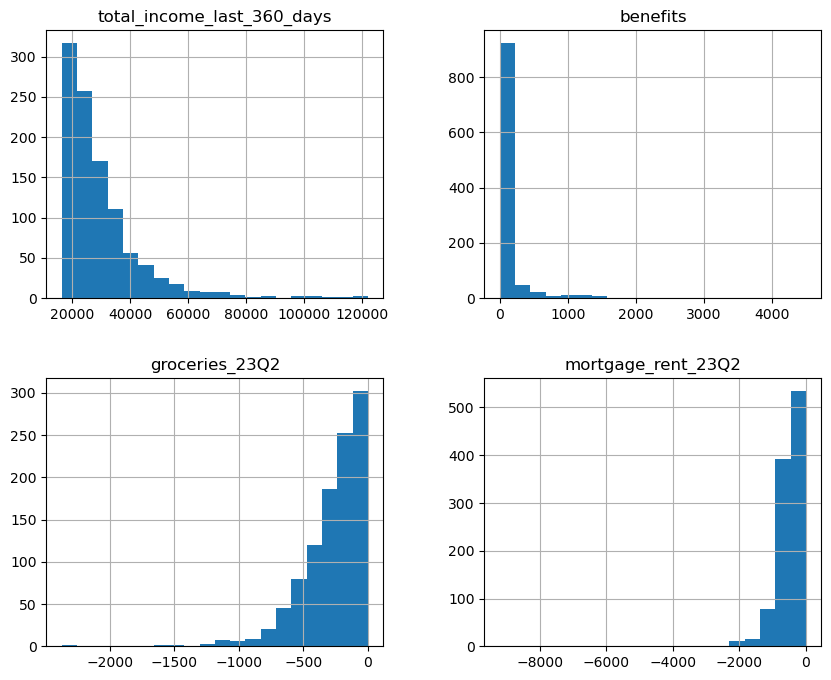

In [78]:
# Create histogram
data.hist(column=['total_income_last_360_days', 'benefits', 'groceries_23Q2', 'mortgage_rent_23Q2'], bins=20, figsize=(10, 8))
plt.show()

In [79]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler object
scaler = StandardScaler()

# Scale the data
scaled_data = scaler.fit_transform(data)

In [80]:
from sklearn.cluster import KMeans

# Assuming you have scaled data in 'scaled_data'
# Choose the number of clusters (K)
num_clusters = 3

# Create a KMeans model
kmeans = KMeans(n_clusters=num_clusters)

# Fit the model to the scaled data
kmeans.fit(scaled_data)

# Get the cluster labels
cluster_labels = kmeans.labels_

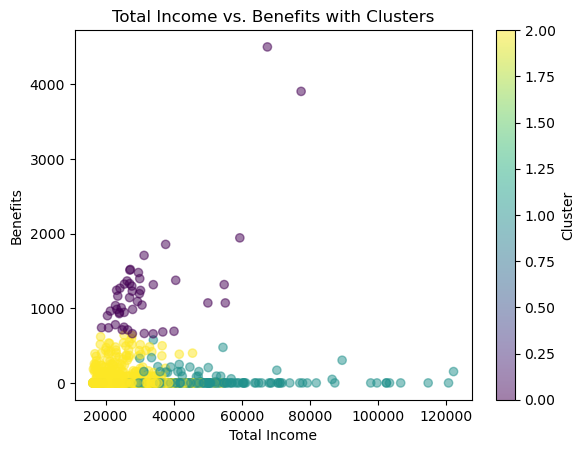

In [81]:
plt.scatter(data['total_income_last_360_days'], data['benefits'], c=cluster_labels, cmap='viridis', alpha=0.5)
plt.xlabel('Total Income')
plt.ylabel('Benefits')
plt.title('Total Income vs. Benefits with Clusters')
plt.colorbar(label='Cluster')
plt.show()

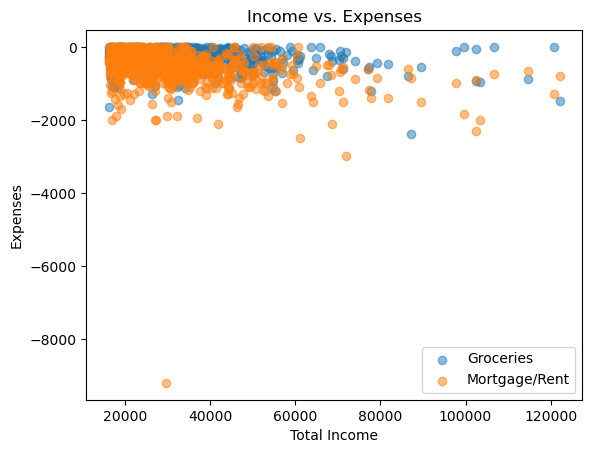

In [82]:
# Income vs. Expenses
plt.scatter(data['total_income_last_360_days'], data['groceries_23Q2'], alpha=0.5)
plt.scatter(data['total_income_last_360_days'], data['mortgage_rent_23Q2'], alpha=0.5)
plt.xlabel('Total Income')
plt.ylabel('Expenses')
plt.legend(['Groceries', 'Mortgage/Rent'])
plt.title('Income vs. Expenses')
plt.show()

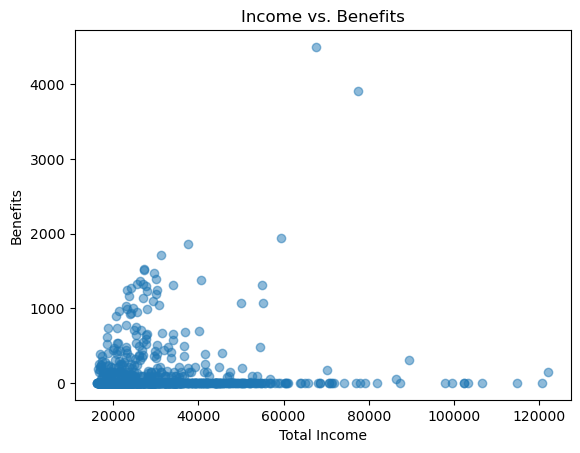

In [83]:
plt.scatter(data['total_income_last_360_days'], data['benefits'], alpha=0.5)
plt.xlabel('Total Income')
plt.ylabel('Benefits')
plt.title('Income vs. Benefits')
plt.show()

#### Looking at dependents

In [84]:
# Average monthly total incomes

tot_in_0 = round(df_model_BEC_applied.loc[df_model_BEC_applied['dependant_number'] == 0, 'total_income_last_360_days'].mean()/12, 2)
tot_in_1 = round(df_model_BEC_applied.loc[df_model_BEC_applied['dependant_number'] == 1, 'total_income_last_360_days'].mean()/12, 2)
tot_in_2 = round(df_model_BEC_applied.loc[df_model_BEC_applied['dependant_number'] == 2, 'total_income_last_360_days'].mean()/12, 2)
tot_in_3 = round(df_model_BEC_applied.loc[df_model_BEC_applied['dependant_number'] == 3, 'total_income_last_360_days'].mean()/12, 2)
tot_in_4 = round(df_model_BEC_applied.loc[df_model_BEC_applied['dependant_number'] == 4, 'total_income_last_360_days'].mean()/12, 2)

In [85]:
# Average spending on groceries

groceries_0 = round(df_model_BEC_applied.loc[df_model_BEC_applied['dependant_number'] == 0, 'hist_groceries_23Q2'].mean(), 2)
groceries_1 = round(df_model_BEC_applied.loc[df_model_BEC_applied['dependant_number'] == 1, 'hist_groceries_23Q2'].mean(), 2)
groceries_2 = round(df_model_BEC_applied.loc[df_model_BEC_applied['dependant_number'] == 2, 'hist_groceries_23Q2'].mean(), 2)
groceries_3 = round(df_model_BEC_applied.loc[df_model_BEC_applied['dependant_number'] == 3, 'hist_groceries_23Q2'].mean(), 2)
groceries_4 = round(df_model_BEC_applied.loc[df_model_BEC_applied['dependant_number'] == 4, 'hist_groceries_23Q2'].mean(), 2)

In [86]:
# Average spending on bills

bills_0 = round(df_model_BEC_applied.loc[df_model_BEC_applied['dependant_number'] == 0, 'hist_bills_23Q2'].mean(), 2)
bills_1 = round(df_model_BEC_applied.loc[df_model_BEC_applied['dependant_number'] == 1, 'hist_bills_23Q2'].mean(), 2)
bills_2 = round(df_model_BEC_applied.loc[df_model_BEC_applied['dependant_number'] == 2, 'hist_bills_23Q2'].mean(), 2)
bills_3 = round(df_model_BEC_applied.loc[df_model_BEC_applied['dependant_number'] == 3, 'hist_bills_23Q2'].mean(), 2)
bills_4 = round(df_model_BEC_applied.loc[df_model_BEC_applied['dependant_number'] == 4, 'hist_bills_23Q2'].mean(), 2)

In [87]:
# Average spending on rent/mortgage

rent_mort_0 = round(df_model_BEC_applied.loc[df_model_BEC_applied['dependant_number'] == 0, 'hist_mortgage_rent_23Q2'].mean(), 2)
rent_mort_1 = round(df_model_BEC_applied.loc[df_model_BEC_applied['dependant_number'] == 1, 'hist_mortgage_rent_23Q2'].mean(), 2)
rent_mort_2 = round(df_model_BEC_applied.loc[df_model_BEC_applied['dependant_number'] == 2, 'hist_mortgage_rent_23Q2'].mean(), 2)
rent_mort_3 = round(df_model_BEC_applied.loc[df_model_BEC_applied['dependant_number'] == 3, 'hist_mortgage_rent_23Q2'].mean(), 2)
rent_mort_4 = round(df_model_BEC_applied.loc[df_model_BEC_applied['dependant_number'] == 4, 'hist_mortgage_rent_23Q2'].mean(), 2)

In [88]:
# Starting Surplus

start_surplus_0 = round(df_model_BEC_applied.loc[df_model_BEC_applied['dependant_number'] == 0, 'hist_monthly_surplus_23Q2'].mean(), 2)
start_surplus_1 = round(df_model_BEC_applied.loc[df_model_BEC_applied['dependant_number'] == 1, 'hist_monthly_surplus_23Q2'].mean(), 2)
start_surplus_2 = round(df_model_BEC_applied.loc[df_model_BEC_applied['dependant_number'] == 2, 'hist_monthly_surplus_23Q2'].mean(), 2)
start_surplus_3 = round(df_model_BEC_applied.loc[df_model_BEC_applied['dependant_number'] == 3, 'hist_monthly_surplus_23Q2'].mean(), 2)
start_surplus_4 = round(df_model_BEC_applied.loc[df_model_BEC_applied['dependant_number'] == 4, 'hist_monthly_surplus_23Q2'].mean(), 2)

In [89]:
# Ending Surplus

end_surplus_0 = round(df_model_BEC_applied.loc[df_model_BEC_applied['dependant_number'] == 0, 'hist_monthly_surplus_25Q2'].mean(), 2)
end_surplus_1 = round(df_model_BEC_applied.loc[df_model_BEC_applied['dependant_number'] == 1, 'hist_monthly_surplus_25Q2'].mean(), 2)
end_surplus_2 = round(df_model_BEC_applied.loc[df_model_BEC_applied['dependant_number'] == 2, 'hist_monthly_surplus_25Q2'].mean(), 2)
end_surplus_3 = round(df_model_BEC_applied.loc[df_model_BEC_applied['dependant_number'] == 3, 'hist_monthly_surplus_25Q2'].mean(), 2)
end_surplus_4 = round(df_model_BEC_applied.loc[df_model_BEC_applied['dependant_number'] == 4, 'hist_monthly_surplus_25Q2'].mean(), 2)

In [90]:
# Change in Surplus

change_surplus_0 = round(end_surplus_0 - start_surplus_0, 2)
change_surplus_1 = round(end_surplus_1 - start_surplus_1, 2)
change_surplus_2 = round(end_surplus_2 - start_surplus_2, 2)
change_surplus_3 = round(end_surplus_3 - start_surplus_3, 2)
change_surplus_4 = round(end_surplus_4 - start_surplus_4, 2)

In [91]:
print('Monthly income:', '\n',
      '0 Dep:', tot_in_0, '\n',
      '1 Dep:', tot_in_1, '\n',
      '2 Dep:', tot_in_2, '\n',
      '3 Dep:', tot_in_3, '\n',
      '4 Dep:', tot_in_4, '\n')

Monthly income: 
 0 Dep: 2309.96 
 1 Dep: 2502.35 
 2 Dep: 2752.94 
 3 Dep: 2792.51 
 4 Dep: 2395.99 



In [92]:
print('Monthly groceries:', '\n',
      '0 Dep:', groceries_0, '\n',
      '1 Dep:', groceries_1, '\n',
      '2 Dep:', groceries_2, '\n',
      '3 Dep:', groceries_3, '\n',
      '4 Dep:', groceries_4, '\n')

Monthly groceries: 
 0 Dep: -230.51 
 1 Dep: -285.69 
 2 Dep: -358.31 
 3 Dep: -431.17 
 4 Dep: -386.44 



In [93]:
print('Monthly bills:', '\n',
      '0 Dep:', bills_0, '\n',
      '1 Dep:', bills_1, '\n',
      '2 Dep:', bills_2, '\n',
      '3 Dep:', bills_3, '\n',
      '4 Dep:', bills_4, '\n')

Monthly bills: 
 0 Dep: -73.99 
 1 Dep: -97.42 
 2 Dep: -116.87 
 3 Dep: -124.65 
 4 Dep: -165.64 



In [94]:
print('Monthly Rent/Mort:', '\n',
      '0 Dep:', rent_mort_0, '\n',
      '1 Dep:', rent_mort_1, '\n',
      '2 Dep:', rent_mort_2, '\n',
      '3 Dep:', rent_mort_3, '\n',
      '4 Dep:', rent_mort_4, '\n')

Monthly Rent/Mort: 
 0 Dep: -460.97 
 1 Dep: -523.04 
 2 Dep: -644.78 
 3 Dep: -680.67 
 4 Dep: -739.19 



In [95]:
print('Change in Surplus:', '\n',
      '0 Dep:', change_surplus_0, '\n',
      '1 Dep:', change_surplus_1, '\n',
      '2 Dep:', change_surplus_2, '\n',
      '3 Dep:', change_surplus_3, '\n',
      '4 Dep:', change_surplus_4, '\n')

Change in Surplus: 
 0 Dep: 36.06 
 1 Dep: 5.06 
 2 Dep: -31.27 
 3 Dep: -50.73 
 4 Dep: -51.75 

